<b>What is Feature:<br></b>A feature is a measurable property of the object you’re trying to analyze. In datasets, features appear as columns:
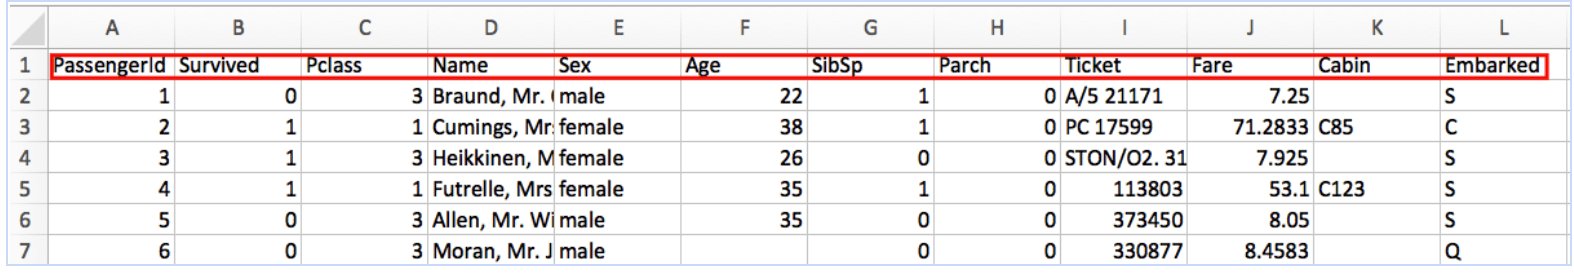

<b>What is Feature Scaling:<br></b>
it is a method to scale numeric features in the same scale or range(e.g -1 to 1, 0 to 1)<br>
It is the last step in data pre-processing.<br>
It is apply only on independent variables<br>
We fit feature scaling on train data and transform on train and test data.

<b>Why Should we Use Feature Scaling?<br></b>
Why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it.
<b>Gradient Descent Based Algorithms:<br></b>
Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Take a look at the formula for gradient descent below:

<b>Gradient descent formula:</b>
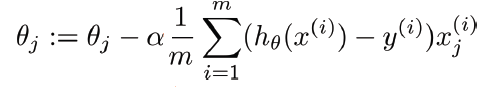

The presence of feature value X in the formula will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

Having features on a similar scale can help the gradient descent converge more quickly towards the minima. 

<b> Distance-Based Algorithms:</b> <br>
Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

For example, let’s say we have data containing high school CGPA scores of students (ranging from 0 to 5) and their future incomes (in thousands Rupees):
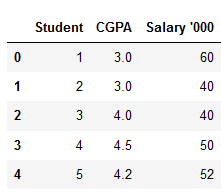

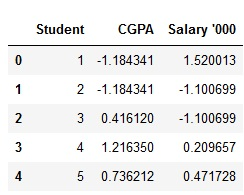

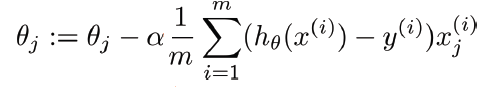

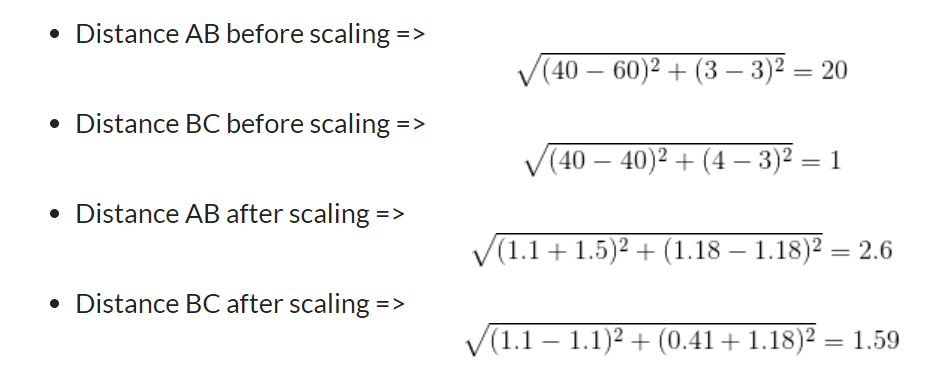

<b>Tree Based Algorithms not required Feature scaling<br> </b>
•Decision Tree, Random Forest, XGBoost

<b>What is Normalization?</b><br>
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:
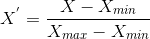

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.

When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0<br>
On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1<br>
If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1<br>
<b>REMEMBER</b><br>
If the original data is normaly distributed, then the standardised distribution will also be normal and vice versa.

<b>What is Standardization?</b><br>
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
<br>
Here’s the formula for standardization:
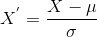


<b>The Big Question – Normalize or Standardize? When to use?</b>

Normalization is good to use when you know that the distribution of your data DOES NOT follow a <b>Gaussian distribution</b>. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.<br>
Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization. <br>
However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

# Feature Scaling
## Standardization & Normalization

In [65]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
df2 = df[['Survived',"Pclass",'Age','Parch']]
df2.head()

,Survived,Pclass,Age,Parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [22]:
df3 = df2.fillna(df2.mean())

In [70]:
X = df3.drop("Survived", axis = 1)
y = df3["Survived"]
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (891, 3)
Shape of y =  (891,)


In [81]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=50)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (712, 3)
Shape of y_train =  (712,)
Shape of X_test =  (179, 3)
Shape of y_test =  (179,)


In [86]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
# here the standardscaler will learn the mean and std value
sc = StandardScaler()
sc.fit(X_train )

StandardScaler()

In [90]:
sc.mean_

array([ 2.28651685, 30.1263921 ,  0.35955056])

In [88]:
sc.scale_

array([ 0.84762603, 12.89111734,  0.7716492 ])

In [30]:
X_train.describe()

,Pclass,Age,Parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [31]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [32]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [33]:
X_train_sc =  pd.DataFrame(X_train_sc, columns = ["pclass",'age','parch'])
X_test_sc =  pd.DataFrame(X_test_sc, columns = ["pclass",'age','parch'])

In [34]:
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [35]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [91]:
# the Minmaxscaler will learn the min value and max value
mmc = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [46]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [47]:
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [48]:
X_train_mmc =  pd.DataFrame(X_train_mmc, columns = ["pclass",'age','parch'])
X_test_mmc =  pd.DataFrame(X_test_mmc, columns = ["pclass",'age','parch'])

In [40]:
X_train_mmc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.65,0.41,0.08
std,0.42,0.18,0.16
min,0.00,0.00,0.00
25%,0.38,0.31,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.00,1.00


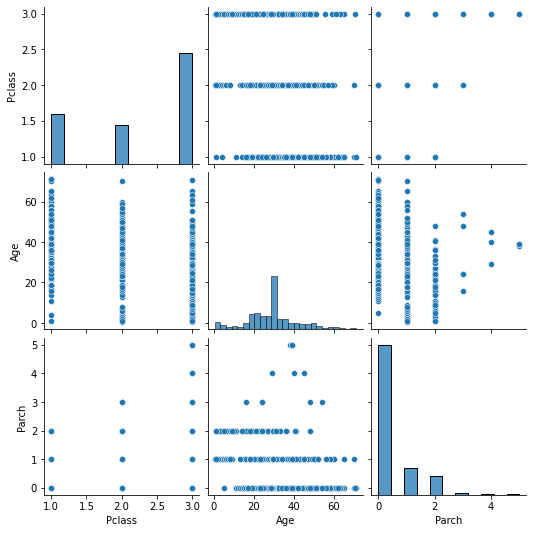

In [41]:
sns.pairplot(X_train)

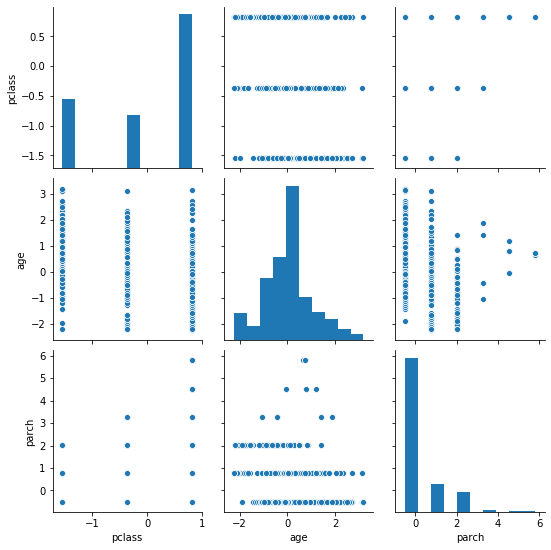

In [26]:
sns.pairplot(X_train_sc)

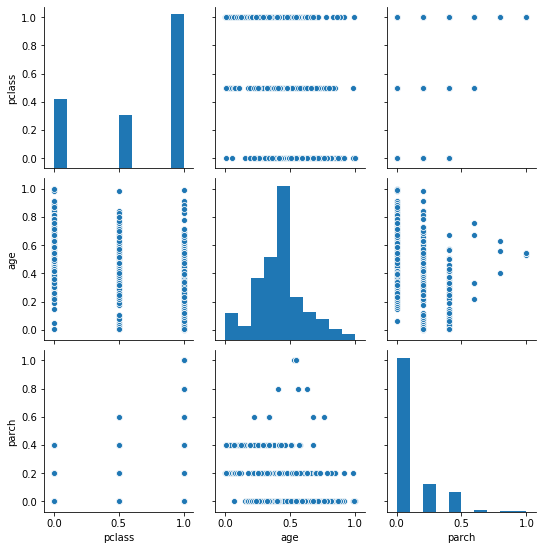

In [27]:
sns.pairplot(X_train_mmc)